In [79]:
#IMPORTING LIBRARIES:
import pandas as pd
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
#Splitting The data  into Train and Test Dataset:
#Train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Gathering
df=pd.read_csv('BigMart Sales Data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
data=df.copy

In [ ]:
EDA

In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.axes

[RangeIndex(start=0, stop=8523, step=1),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object')]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Lowering the down column names
df.columns = df.columns.str.lower()

In [11]:
#Calculating Missing Values
(df.isnull().sum()/len(df))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
dtype: float64

In [ ]:
Feature Engineering

In [12]:
group_mean_weight = df.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])

C:\Users\HP\AppData\Local\Temp\ipykernel_10824\2719359239.py:1: FutureWarning: The provided callable <function mean at 0x00000228C76BB310> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_mean_weight = df.pivot_table(index = ["item_type"], values = "item_weight", aggfunc = [np.mean])


In [13]:
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [14]:
mean_weight = group_mean_weight.iloc[:, 0]

In [15]:
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [16]:
df['item_type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [18]:


# Dictionary to store mean values for each Item_Type
item_weight_map = {
    "Baking Goods": 12.277,
    "Breads": 11.347,
    "Breakfast": 12.768,
    "Canned": 12.30,
    "Dairy": 13.42,
    "Frozen Foods": 12.867061,
    "Fruits and Vegetables": 13.224769,
    "Hard Drinks": 11.400328,
    "Health and Hygiene": 13.142314,
    "Household": 13.384736,
    "Meat": 12.817344,
    "Others": 13.853285,
    "Seafood": 12.552843,
    "Snack Foods": 12.987880,
    "Soft Drinks": 11.847460,
    "Starchy Foods": 13.690731
}

# Using list comprehension inside apply
df["item_weight"] = [
    item_weight_map[item_type] if pd.isnull(weight) else weight
    for item_type, weight in zip(df["item_type"], df["item_weight"])
]


In [ ]:
How It Works:
Created a dictionary (item_weight_map) that stores the mean Item_Weight for each Item_Type.
Used list comprehension with zip(df["Item_Type"], df["Item_Weight"]) to:
Check if Item_Weight is NaN
If NaN, replace it with the corresponding mean value from item_weight_map
Otherwise, keep the original value
Faster than using a function with apply()! 🚀
Alternative Approach Using .apply() (Still Efficient)
python
Copy
Edit
df["Item_Weight"] = df.apply(lambda row: item_weight_map[row["Item_Type"]] 
                             if pd.isnull(row["Item_Weight"]) else row["Item_Weight"], axis=1)


In [19]:
df.isnull().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [22]:
# Function for Imputing Missing value in Outlet_Size column:

def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size    

#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
df["outlet_size"] = df[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_10824\927252164.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size = cols[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_10824\927252164.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ot_type = cols[1]


In [23]:
df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [25]:
#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
df["outlet_size"] = df[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_10824\927252164.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size = cols[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_10824\927252164.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ot_type = cols[1]


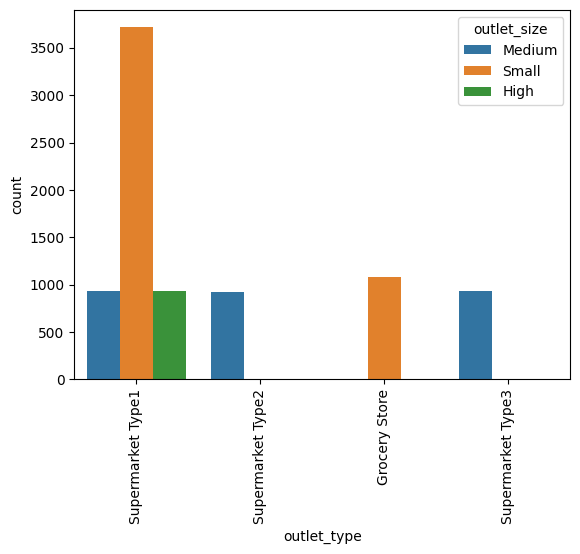

In [33]:
#FINDING FREQUENCY COUNT OF OUTLET TYPE


sns.countplot(data=df, x="outlet_type", hue="outlet_size")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
Feature Engineering

In [35]:
df["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [37]:
df["item_fat_content"] = df["item_fat_content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()

In [39]:
df["item_fat_content"].unique()

array(['low fat', 'regular'], dtype=object)

In [40]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [42]:
mean_visibility = df.pivot_table(index = "item_identifier",  values = "item_visibility")

In [43]:
mean_visibility

,item_visibility
item_identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
...,...
NCZ30,0.024956
NCZ41,0.051623
NCZ42,0.009044


In [47]:
df.loc[(df["item_visibility"] == 0.0), "item_visibility"] = df.loc[(df["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])

C:\Users\HP\AppData\Local\Temp\ipykernel_10824\125057584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "outlet_identifier", y= "item_outlet_sales",palette='viridis')


<Axes: xlabel='outlet_identifier', ylabel='item_outlet_sales'>

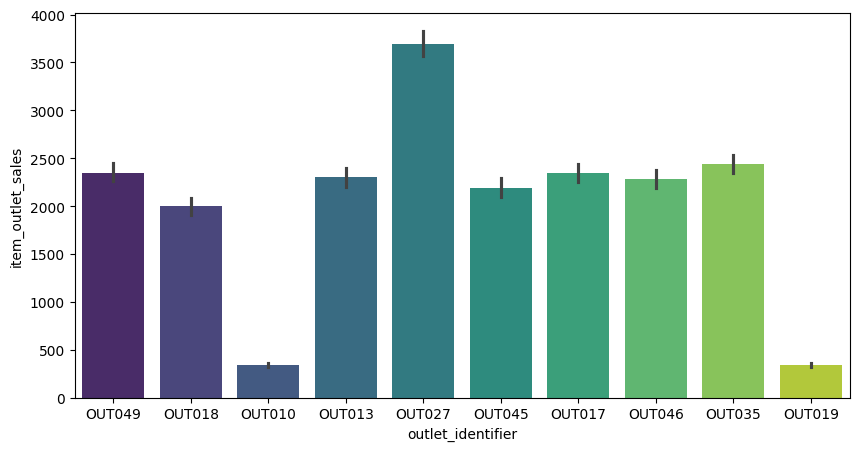

In [55]:
#understanding outlet_identifier depending on item_outlet_sales

plt.figure(figsize = (10,5))
sns.barplot(data = df, x = "outlet_identifier", y= "item_outlet_sales",palette='viridis')

Text(0, 0.5, 'Mean of Item outlet sales')

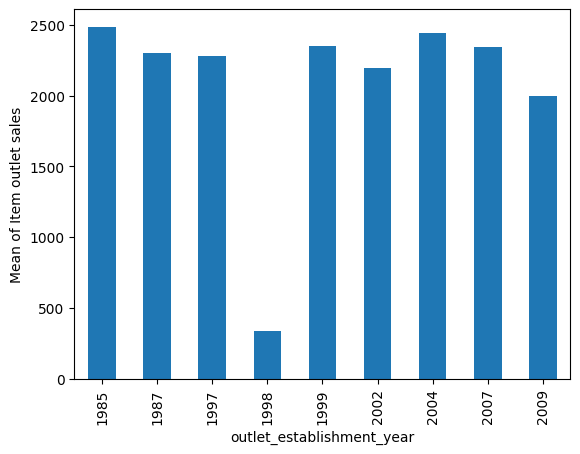

In [56]:
#Understanding to ultet_establishment per year with respective to mean of each respective year item outlet sales
df.groupby("outlet_establishment_year")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

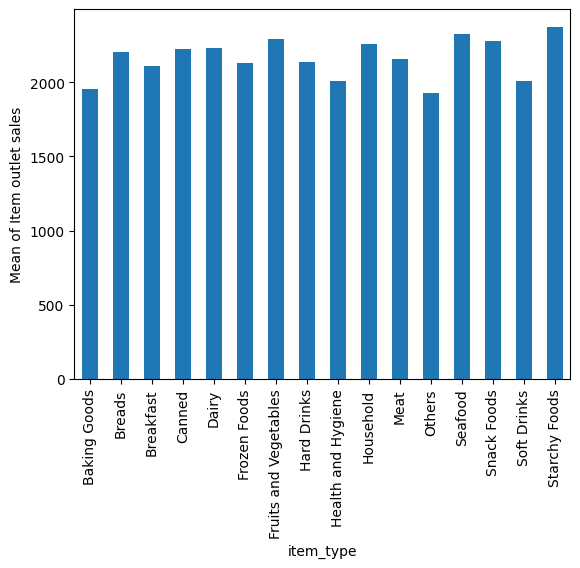

In [58]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
df.groupby("item_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

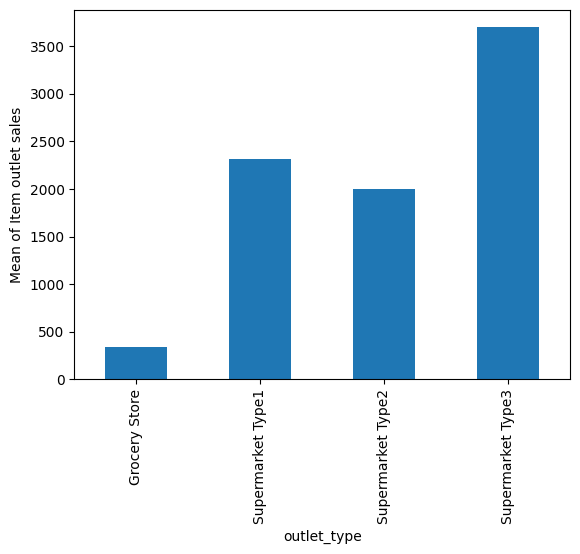

In [61]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
df.groupby("outlet_type")["item_outlet_sales"].mean().plot.bar()
plt.ylabel("Mean of Item outlet sales")

In [62]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
df.select_dtypes('object')

,item_identifier,item_fat_content,item_type,outlet_identifier,outlet_size,outlet_location_type,outlet_type
0,FDA15,low fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,low fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,low fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,low fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,low fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [65]:
cols = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']

#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
for i in cols:
    x  = df[i].value_counts().to_dict()
    df[i] = df[i].map(x)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   int64  
 1   item_weight                8523 non-null   float64
 2   item_fat_content           8523 non-null   int64  
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   int64  
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   int64  
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                8523 non-null   int64  
 9   outlet_location_type       8523 non-null   int64  
 10  outlet_type                8523 non-null   int64  
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [67]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


In [68]:
dataset=df.copy()

In [69]:
dataset

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.300,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.920,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.500,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.200,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.930,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,8,6.865,5517,0.056783,1200,214.5218,932,932,932,3350,5577,2778.3834
8519,6,8.380,3006,0.046982,648,108.1570,929,929,4798,2785,5577,549.2850
8520,6,10.600,5517,0.035186,520,85.1224,930,930,4798,2785,5577,1193.1136
8521,6,7.210,3006,0.145221,1200,103.1332,928,928,2793,3350,928,1845.5976


<Axes: >

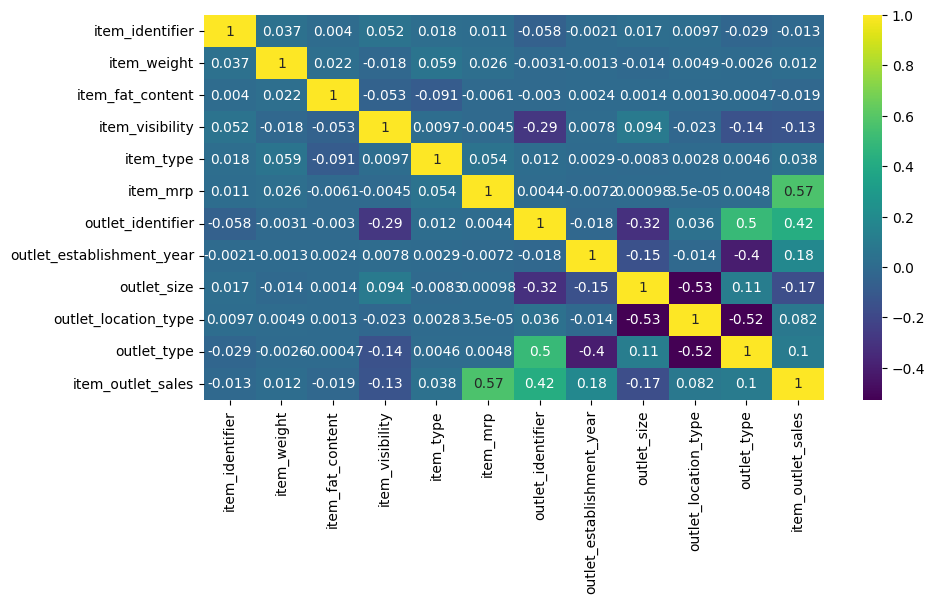

In [71]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr(), cmap = "viridis", annot = True)

In [73]:
#REMOVING LESS CORRELATED COLUMNS 
new_data =dataset.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [75]:
new_data.skew()

item_visibility              1.233294
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -0.803018
outlet_type                 -0.650418
item_outlet_sales            1.177531
dtype: float64

In [76]:
# Visualizng skewness of the dataset

<Axes: xlabel='item_outlet_sales', ylabel='Density'>

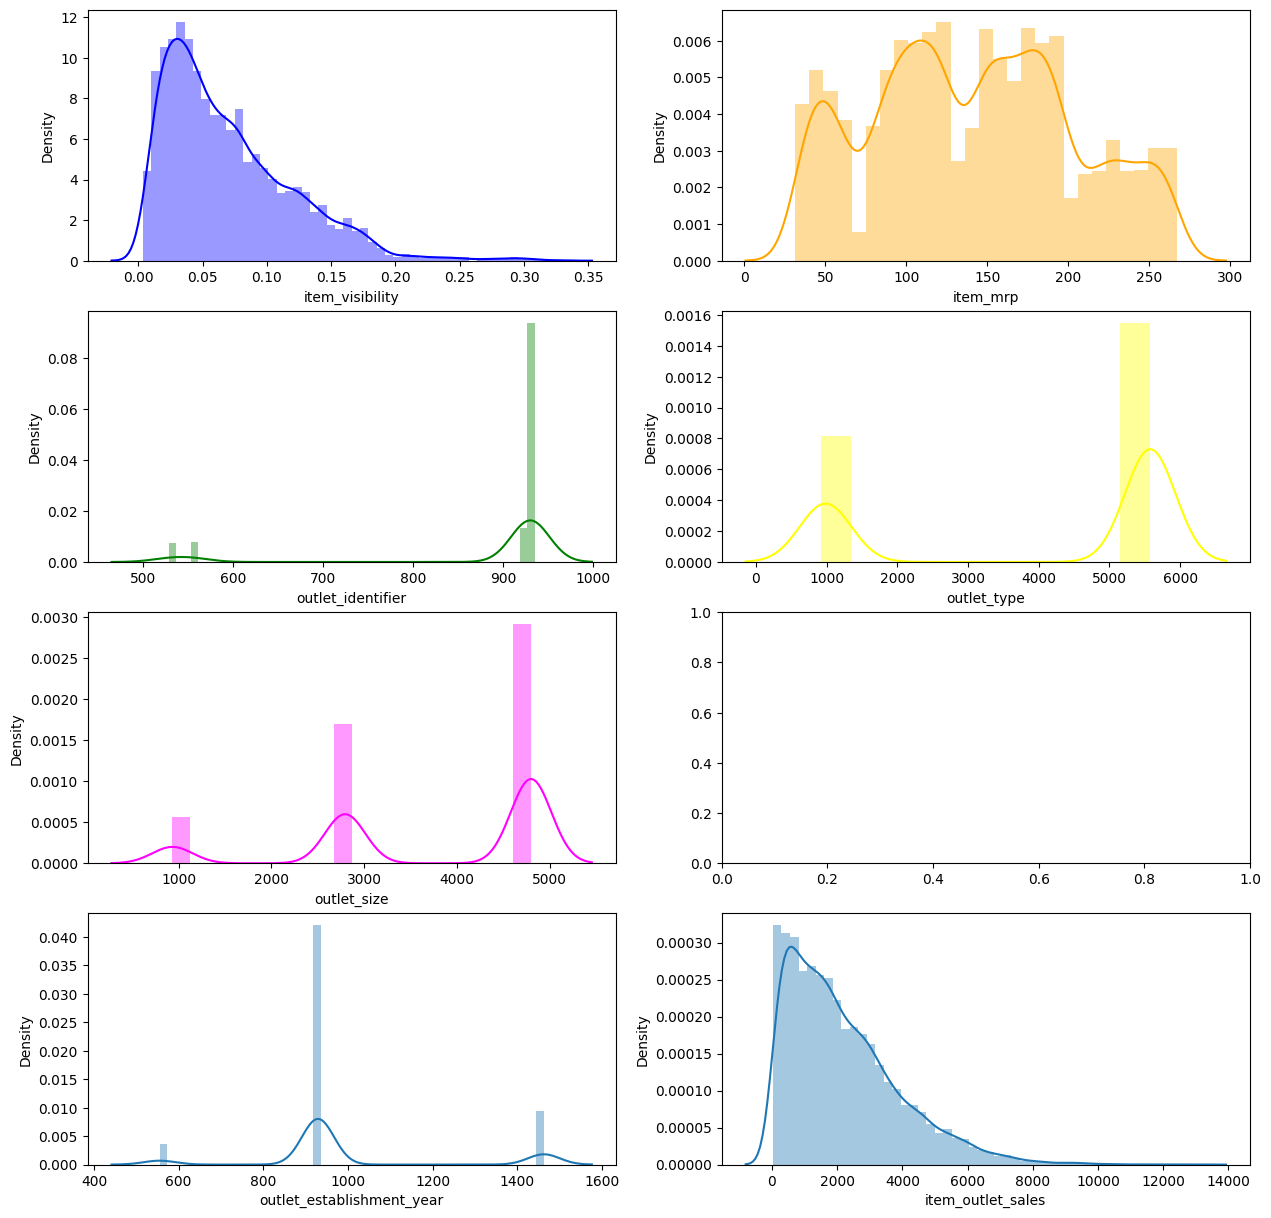

In [82]:
# Before Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "orange")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "green")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "yellow")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])

In [83]:
new_data.columns

Index(['item_visibility', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

In [84]:
for i in new_data.columns:
    new_data[i] =np.log(new_data[i])

In [85]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626406,8.225540
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,-4.181625,5.204529,6.318968,6.318968,8.475954,6.987490,6.596300
4,-4.818097,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446


<Axes: xlabel='item_outlet_sales', ylabel='Density'>

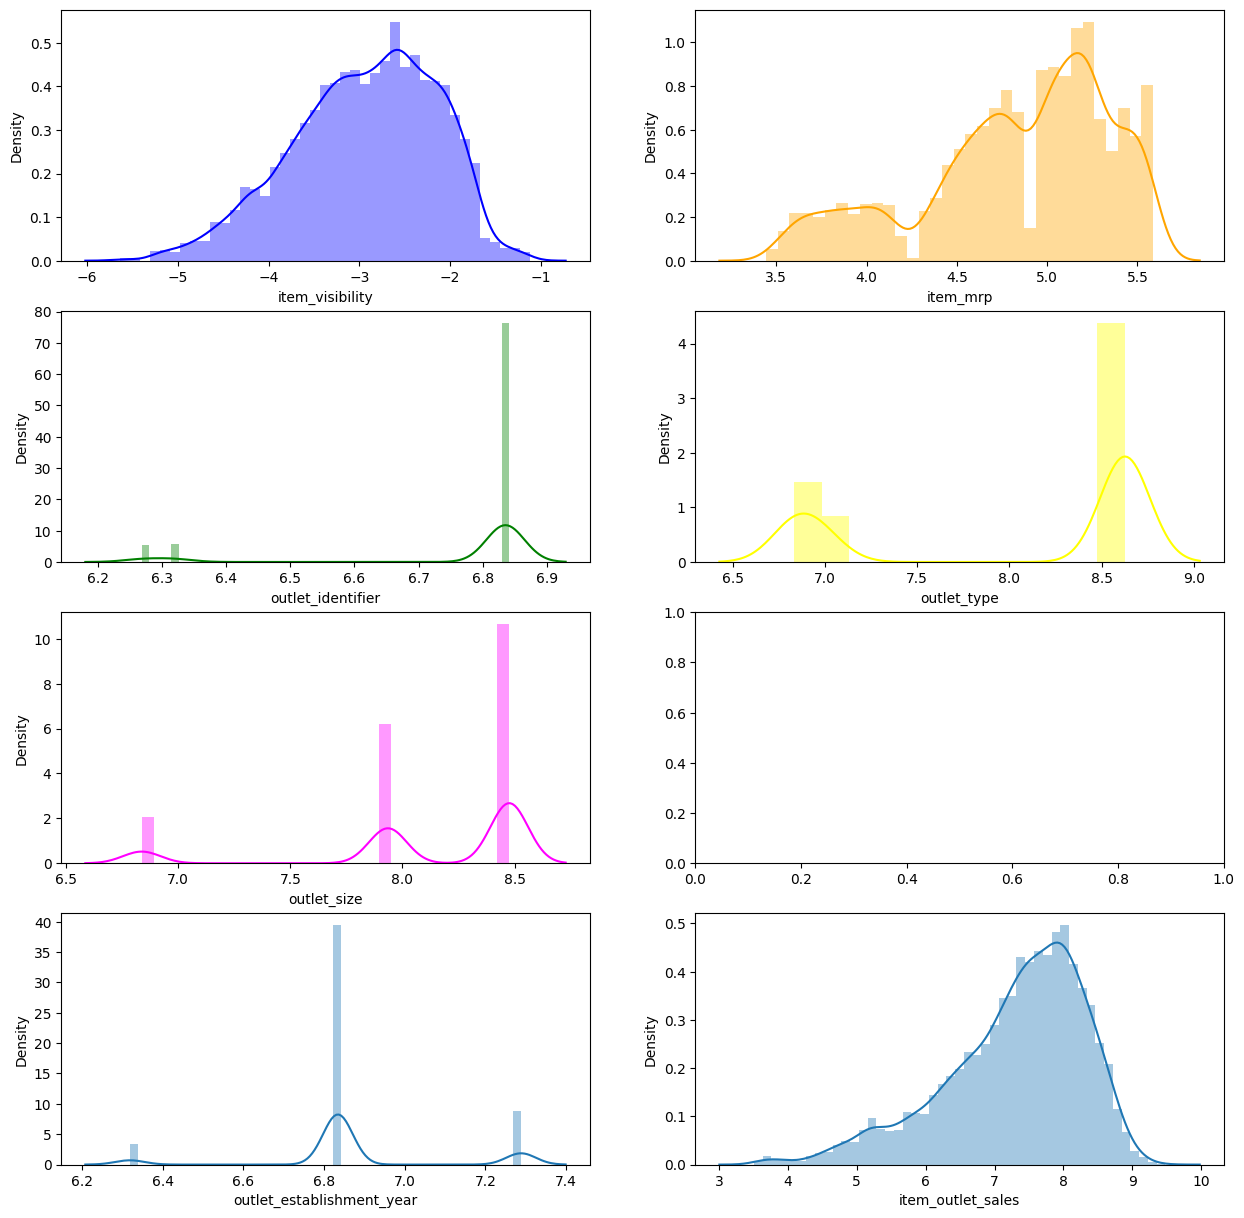

In [86]:
# After Transformation
fig, ax = plt.subplots(4,2,figsize = (15,15))
sns.distplot(new_data["item_visibility"], kde =True, ax=ax[0,0], color = "blue")
sns.distplot(new_data["item_mrp"], kde =True, ax=ax[0,1], color = "orange")
sns.distplot(new_data["outlet_identifier"], kde =True, ax=ax[1,0], color = "green")
sns.distplot(new_data["outlet_type"], kde =True, ax=ax[1,1], color = "yellow")
sns.distplot(new_data["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["outlet_establishment_year"], kde =True, ax=ax[3,0])
sns.distplot(new_data["item_outlet_sales"], kde =True, ax=ax[3,1])

In [87]:
new_data.skew()

item_visibility             -0.429840
item_mrp                    -0.735795
outlet_identifier           -2.249965
outlet_establishment_year    0.026025
outlet_size                 -1.539875
outlet_type                 -0.657515
item_outlet_sales           -0.887753
dtype: float64

In [88]:
# Feature Selection
# Fitting Linear Regression Model:

In [89]:
#Independent Variables:
x = new_data.drop("item_outlet_sales", axis = 1) 

#Depenedent Variables 
y = new_data["item_outlet_sales"].values.reshape(-1,1)

In [90]:
# Model Building

In [93]:
#Splitting The data  into Train and Test Dataset:

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)


In [94]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [95]:
#Prediction
y_pred = regressor.predict(x_test)

In [96]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.7570281460077115

In [97]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.5197787447163865

In [ ]:
1. R2_Score = 75.70%¶
2. RMSE = 0.519